
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - Regression <br>
<font color=696880 size=4>
Mahan Bayhaghi & Arash Ziyaei Razban


____

## Personal Data

In [1]:
# please fill in your student number and name
student_number = '401107613'
Name = 'Kimia'
Last_Name = 'Vanaei'

In this notebook, we will implement regression methods. We will start from simple Linear Regression and make our way towards more complicated regressors as well.

##Libraries

You are not allowed to use sklearn ready regression methods.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Linear and Polynomieal Regression (60 points)


### Linear Regression (10 points)


Linear regression assumes a linear relationship between the input features and the output. The model predicts $ y $ using the equation:

$$
y = \mathbf{Xw} + b
$$

Here:
- $ \mathbf{X} $: The matrix of input features.
- $ \mathbf{w} $: The weight vector (parameters).
- $ b $: The bias term.
- $ y $: The predicted output.

The objective is to find $ \mathbf{w} $ and $ b $ that minimize the error between predicted and actual values. The error is typically measured using the **Mean Squared Error (MSE):**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$


The optimal solution for $ \mathbf{w} $ and $ b $ can be computed directly using the closed-form equation:

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

Where:
- $ \mathbf{X}^T $: Transpose of the feature matrix.
- $ (\mathbf{X}^T \mathbf{X})^{-1} $: Inverse of the Gram matrix.

For simplicity, $ b $ (bias) can be incorporated into $ \mathbf{X} $ by adding a column of ones.

We implement linear regression from scratch using a custom class `LinearRegressor`:

1. **Initialization:** The class stores model weights.
2. **Fitting the Model:** The `fit` method computes weights using the closed-form solution.
3. **Prediction:** The `predict` method uses the weights to make predictions for new data.


In [3]:
class LinearRegressor:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Fits the linear regression model using the closed-form solution.
        
        Args:
        - X (ndarray): Input features of shape (n_samples, n_features).
        - y (ndarray): Target values of shape (n_samples,).
        """
        # Add a column of ones to X for the bias term
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        
        # closed-form solution
        weights = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
        
        self.bias = weights[0]
        self.weights = weights[1:]

    def predict(self, X):
        """
        Predicts target values using the fitted model.

        Args:
        - X (ndarray): Input features of shape (n_samples, n_features).

        Returns:
        - ndarray: Predicted values of shape (n_samples,).
        """
        return np.dot(X, self.weights) + self.bias

In this section, generate a synthetic linear dataset and utilize the implemented LinearRegressor to fit and evaluate it. Your calculated weights and real weights must be similar:

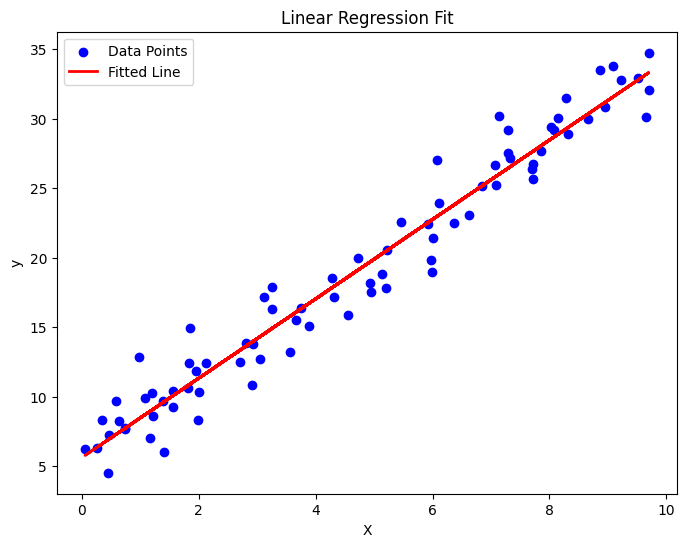

Estimated Weights: [2.85686254 5.60872672]


In [4]:
# Generate a synthetic dataset
np.random.seed(42)
n_samples = 100
n_features = 1
true_weights = np.array([3.0])
true_bias = 5.0
X = 10 * np.random.rand(n_samples, n_features)
y = np.dot(X, true_weights) + true_bias + np.random.randn(n_samples) * 2.0

# Split the dataset into training and validation sets
X_fit, X_val, y_fit, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize and train the model
model = LinearRegressor()
model.fit(X_fit, y_fit)

# Make predictions
y_pred_train = model.predict(X_fit)
y_pred_val = model.predict(X_val)

plt.figure(figsize=(8, 6))
plt.scatter(X_fit, y_fit, color="blue", label="Data Points")
plt.plot(X_fit, model.predict(X_fit), color="red", label="Fitted Line", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

print("Estimated Weights:", np.array([*model.weights, model.bias]).flatten())

### Polynomial Regression (25 points)


Polynomial Regression is an extension of Linear Regression that models the relationship between the dependent and independent variables as an nth-degree polynomial.

Given the features \(X\), polynomial regression tries to fit a model of the form:

$$
y = w_0 + w_1 X + w_2 X^2 + w_3 X^3 + \dots + w_n X^n
$$

Where:
- $X$ is the input feature.
- $w_0, w_1, \dots, w_n$ are the weights (coefficients) to be learned.
- $n$ is the degree of the polynomial.

To fit this model, we can use the same closed-form solution as in linear regression, but now the features include powers of $X$.


In [5]:
class PolynomialRegressor:
    def __init__(self, degree=2):
        """
        Initialize the PolynomialRegressor.

        Args:
        - degree (int): The degree of the polynomial to fit.
        """
        self.degree = degree
        self.weights = None

    def fit(self, X, y):
        """
        Fits the polynomial regression model using the closed-form solution.

        Args:
        - X (ndarray): Input features of shape (n_samples, 1).
        - y (ndarray): Target values of shape (n_samples,).
        """
        n_samples = X.shape[0]
        X_poly = np.ones((n_samples, self.degree + 1))
        for i in range(1, self.degree + 1):
            X_poly[:, i] = X[:, 0] ** i

        # closed-form solution: (X^T X)^-1 X^T y
        self.weights = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

    def predict(self, X):
        """
        Predicts target values using the fitted polynomial regression model.

        Args:
        - X (ndarray): Input features of shape (n_samples, 1).

        Returns:
        - ndarray: Predicted values of shape (n_samples,).
        """
        n_samples = X.shape[0]
        X_poly = np.ones((n_samples, self.degree + 1))
        for i in range(1, self.degree + 1):
            X_poly[:, i] = X[:, 0] ** i

        return X_poly @ self.weights

Let's create a sample dataset of size 100 from following formula:

$$
y = x^4 - 4x^3 + 16 x + 4ϵ \ \ \ , \ \ \ x \in [-2, 2]
$$

where $\epsilon$ represents noise drawn from a $\mathcal{N}(0, 1)$ distribution.

The dataset will be split into 80% training data and 20% test data. Next, visualize the fitted polynomial curves for degrees ranging from 3 to 11. Additionally, compute and display the RMSE for both the training and test sets:

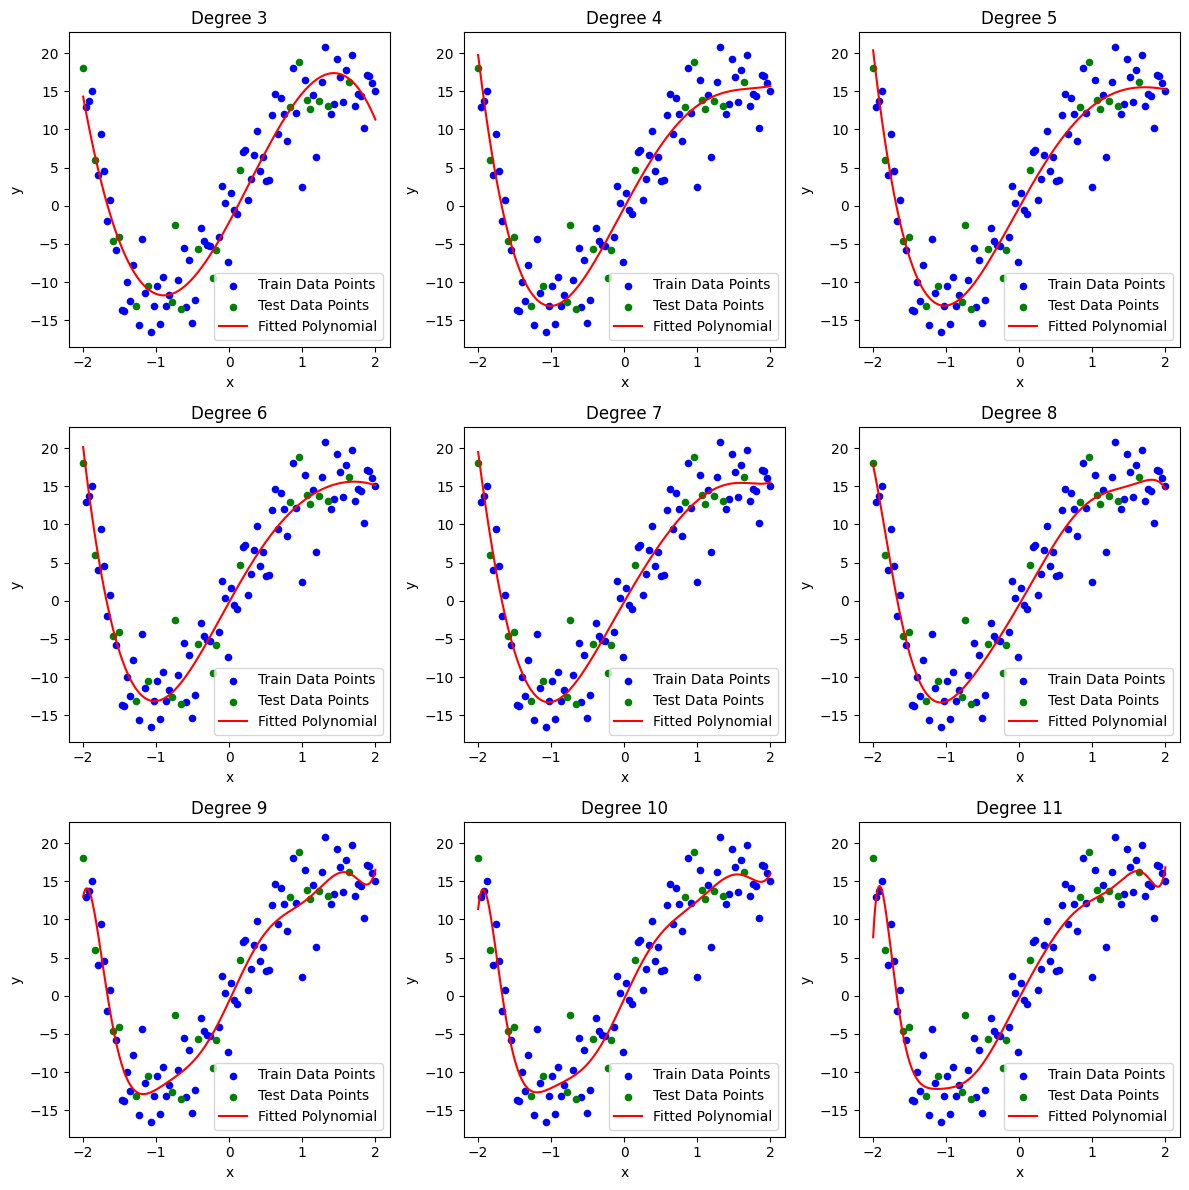

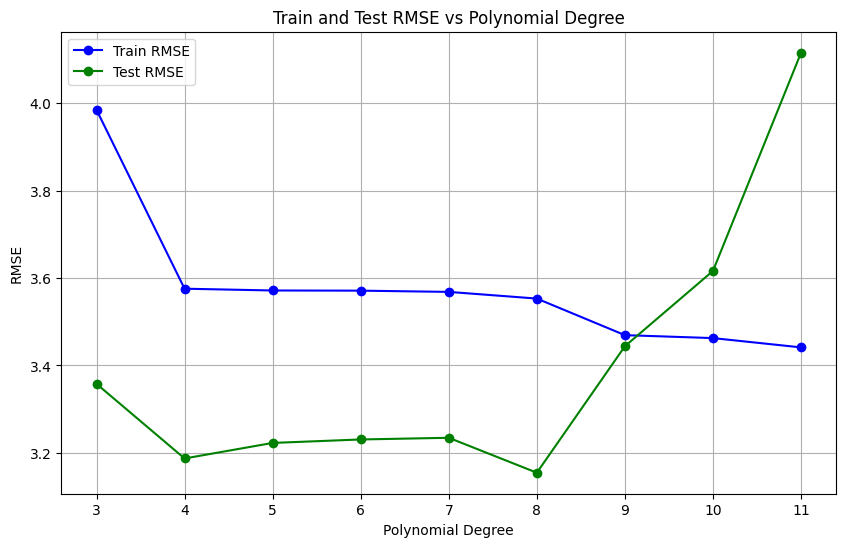

In [119]:
np.random.seed(42)
x = np.linspace(-2, 2, 100).reshape(-1, 1)
epsilon = np.random.normal(0, 1, size=x.shape)
y = x**4 - 4*x**3 + 16*x + 4*epsilon

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

degrees = range(3, 12)
train_rmse = []
test_rmse = []

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()

for idx, degree in enumerate(degrees):
    model = PolynomialRegressor(degree=degree)
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    X_curve = np.linspace(-2, 2, 500).reshape(-1, 1)
    y_curve = model.predict(X_curve)

    axes[idx].scatter(x_train, y_train, color="blue", label="Train Data Points", s=20)
    axes[idx].scatter(x_test, y_test, color="green", label="Test Data Points", s=20)
    axes[idx].plot(X_curve, y_curve, color="red", label="Fitted Polynomial")
    axes[idx].set_title(f"Degree {degree}")
    axes[idx].legend()
    axes[idx].set_xlabel("x")
    axes[idx].set_ylabel("y")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_rmse, '-o', label="Train RMSE", color="blue")
plt.plot(degrees, test_rmse, '-o', label="Test RMSE", color="green")
plt.title("Train and Test RMSE vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

**Does this RMSE plot confirm your previous knowledge of the bias-variance tradeoff?**  

**Ans:**  

Yes, the plot confirms the bias-variance tradeoff. Initially, as the polynomial degree increases, the model captures more complexity in the data, reducing bias, which is evident from the decrease in both train and test RMSE. However, after a certain degree (around 8 in this case), the model becomes too complex and starts overfitting the training data. This leads to a divergence between train and test RMSE, with train RMSE continuing to decrease while test RMSE increases, indicating higher variance.


**Could you explain the reason behind the change in RMSE behavior after a certain polynomial degree?**  

**Ans:**  

- Before Degree 8: The model has high bias and low variance, meaning it is too simple to capture the underlying patterns. Increasing the polynomial degree allows the model to better fit the training data, resulting 
  in lower RMSE for both train and test sets.

- After Degree 8: The model becomes too complex, capturing noise in the training data rather than the true signal. This leads to a significant reduction in training RMSE but an increase in test RMSE, as the 
  model generalizes poorly to unseen data. This is a hallmark of high variance.


### Regularization (25 points)

Polynomial Regression can be enhanced with **regularization** to reduce the risk of overfitting, especially when working with high-degree polynomials. Two common regularization techniques are **Ridge Regression** and **Lasso Regression**, which modify the cost function to penalize large coefficients.

1. **Ridge Regression (L2 Regularization)**:
   Ridge regression penalizes the sum of the squared coefficients. The modified cost function is:
   $$
   J(w) = \frac{1}{2m} \| y - Xw \|^2 + \lambda \| w \|^2
   $$
   - $ \lambda $: Regularization strength.
   - $ \| w \|^2 $: Sum of squared weights.

2. **Lasso Regression (L1 Regularization)**:
   Lasso regression penalizes the sum of the absolute coefficients. The modified cost function is:
   $$
   J(w) = \frac{1}{2m} \| y - Xw \|^2 + \lambda \| w \|_1
   $$
   - $ \| w \|_1 $: Sum of absolute weights.


**Gradient Descent** is an iterative optimization algorithm used to minimize the cost function. For polynomial regression with regularization, the gradient updates are:

- For **Ridge**:
   $$
   w = w - \eta \left[ \frac{\partial J(w)}{\partial w} \right] = w - \eta \left[ \frac{1}{m} X^T (Xw - y) + \frac{\lambda}{m} w \right]
   $$

- For **Lasso**:
   $$
   w = w - \eta \left[ \frac{1}{m} X^T (Xw - y) + \frac{\lambda}{m} \cdot \text{sign}(w) \right]
   $$
   Where:
   - $ \eta $ is the learning rate.
   - $ \text{sign}(w) $ is the sign of the weights.


In [120]:
class PolynomialRegressorGD:
    def __init__(self, degree=2, regularization=None, lambda_=0.01, learning_rate=0.001, max_iter=1000):
        self.degree = degree
        self.regularization = regularization
        self.lambda_ = lambda_
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None

    def _transform(self, X):
        n_samples = X.shape[0]
        X_poly = np.ones((n_samples, self.degree + 1))
        for i in range(1, self.degree + 1):
            X_poly[:, i] = X[:, 0] ** i
        return X_poly

    def fit(self, X, y):
        X_poly = self._transform(X)
        n_samples, n_features = X_poly.shape

        self.weights = np.zeros((n_features, 1))

        for _ in range(self.max_iter):
            y_pred = X_poly @ self.weights
            gradient = (1 / n_samples) * (X_poly.T @ (y_pred - y.reshape(-1, 1)))

            if self.regularization == 'ridge':
                gradient += (self.lambda_ / n_samples) * self.weights

            elif self.regularization == 'lasso':
                gradient += (self.lambda_ / n_samples) * np.sign(self.weights)

            gradient = np.clip(gradient, -1e4, 1e4)

            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        X_poly = self._transform(X)
        return X_poly @ self.weights

Using the previously created sample dataset, fit a polynomial regression model of degree 11. Test the RMSE of the model with regularization parameter values $ \{0.05, 0.1, 0.5, 1, 5, 10\} $.  

Plot the results to visualize the effect of $ \lambda $ on model performance.  


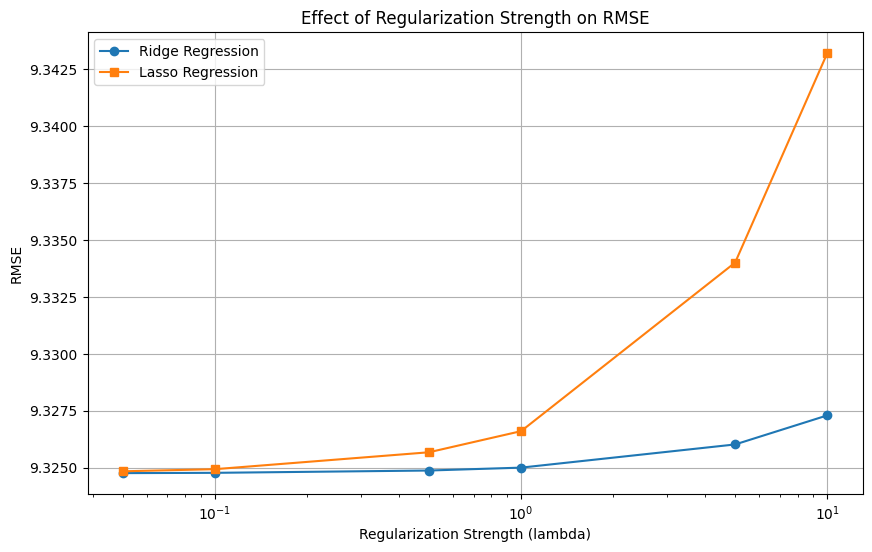

In [126]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lambda_values = [0.05, 0.1, 0.5, 1, 5, 10]
ridge_rmse = []
lasso_rmse = []

for lambda_ in lambda_values:
    model = PolynomialRegressorGD(degree=11, regularization='ridge', lambda_=lambda_, learning_rate=0.00001, max_iter=10000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    ridge_rmse.append(rmse)

for lambda_ in lambda_values:
    model = PolynomialRegressorGD(degree=11, regularization='lasso', lambda_=lambda_, learning_rate=0.00001, max_iter=10000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    lasso_rmse.append(rmse)

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, ridge_rmse, label='Ridge Regression', marker='o')
plt.plot(lambda_values, lasso_rmse, label='Lasso Regression', marker='s')
plt.xscale('log')
plt.xlabel('Regularization Strength (lambda)')
plt.ylabel('RMSE')
plt.title('Effect of Regularization Strength on RMSE')
plt.legend()
plt.grid(True)
plt.show()

**Can you explain the behaviour of RMSE for both ridge and lasso regularization?**

**Ans:**

In the plot, Ridge Regression keeps the RMSE fairly stable as λ increases, with only a small rise at very high λ. This happens because Ridge reduces all coefficients evenly, preventing overfitting while still keeping the model effective. On the other hand, Lasso Regression shows a sharper increase in RMSE as λ grows, especially for larger values. This is because Lasso tends to shrink some coefficients to zero, simplifying the model too much when λ is high. In short, Ridge is more stable with different λ values, while Lasso can overly simplify the model and hurt performance when regularization is too strong.

Generate a new sample dataset using the following formula:

$$
y = 2 \sin\left(\frac{\pi}{2} x\right) + \frac{1}{2} ϵ \quad , \quad x \in [-4, 4]
$$

where $ ϵ $ represents noise sampled from a $\mathcal{N}(0, 1) $ distribution. Plot the fitted polynomial with degrees ranging from 4 to 12 as well as the RMSE:


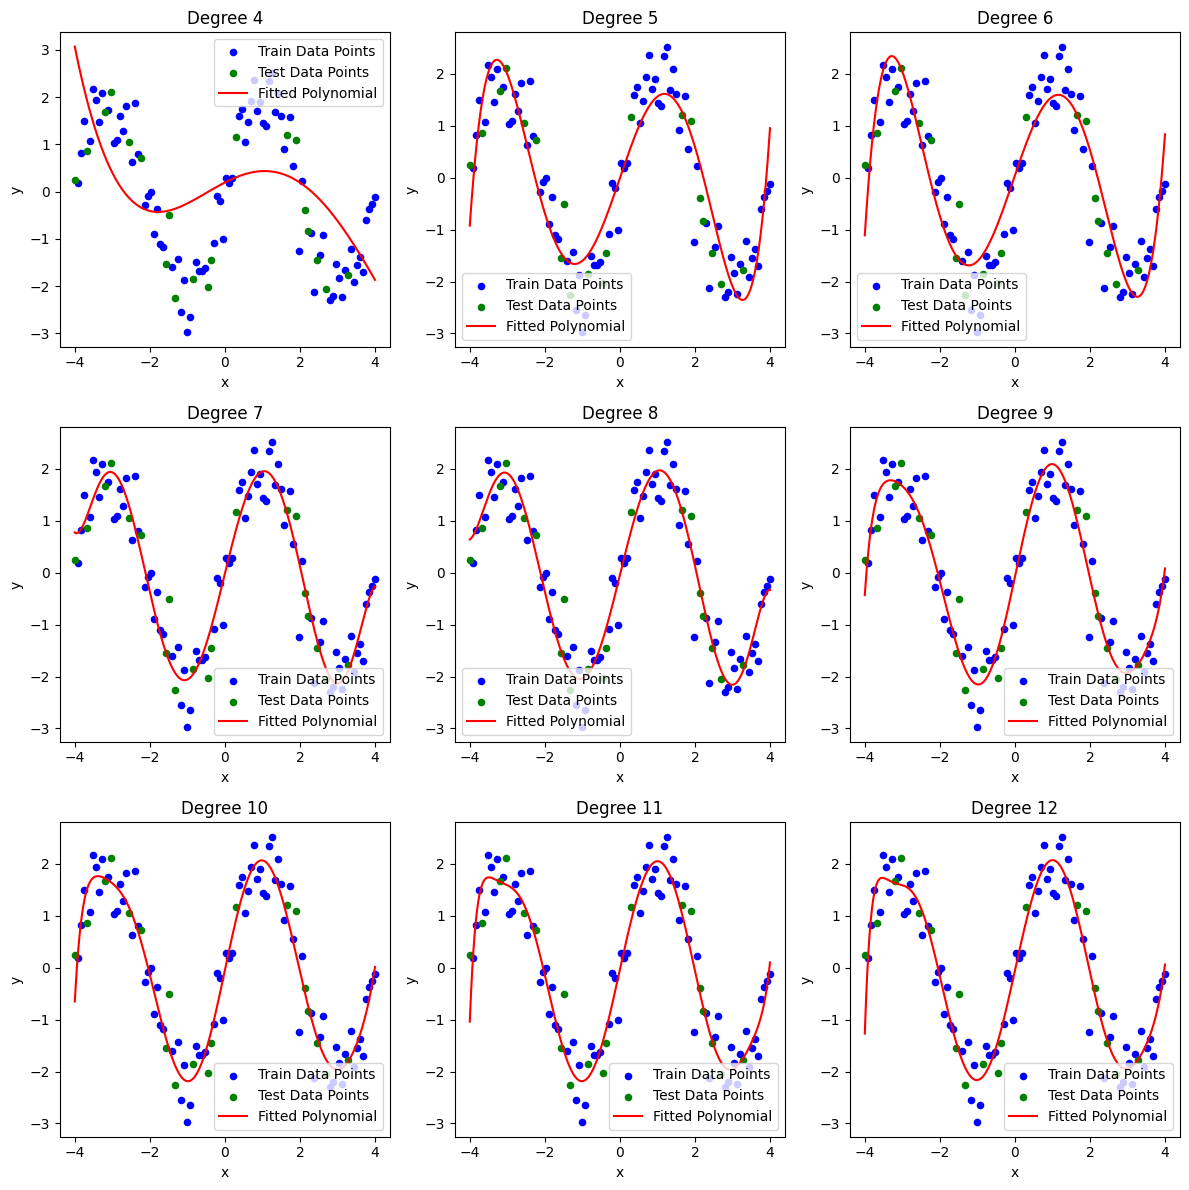

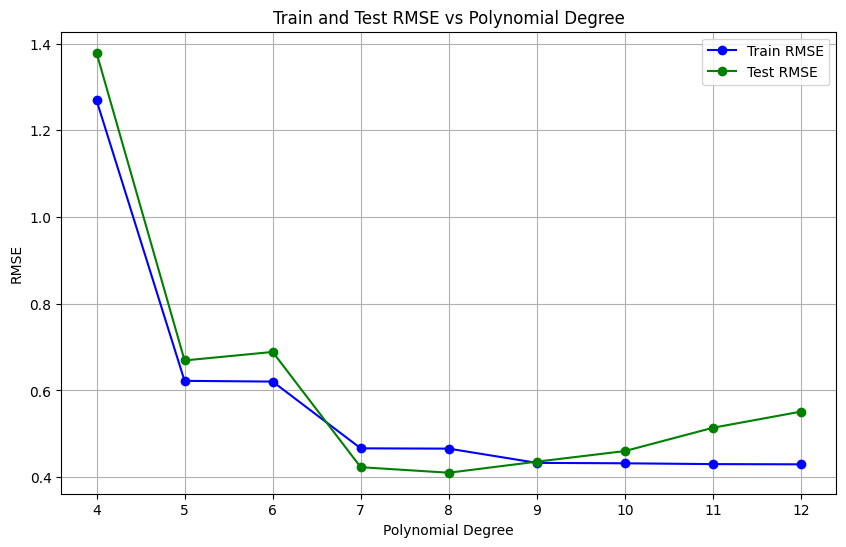

In [127]:
np.random.seed(42)
xx = np.linspace(-4, 4, 100).reshape(-1, 1)
epsilon2 = np.random.normal(0, 1, size=xx.shape)
yy = 2 * np.sin((np.pi / 2) * xx) + 0.5 * epsilon2

xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.2, random_state=42)

degrees = range(4, 13)
train_rmse2 = []
test_rmse2 = []

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()

for idx, degree in enumerate(degrees):
    model = PolynomialRegressor(degree=degree)
    model.fit(xx_train, yy_train)
    
    yy_train_pred = model.predict(xx_train)
    yy_test_pred = model.predict(xx_test)
    
    train_rmse2.append(np.sqrt(mean_squared_error(yy_train, yy_train_pred)))
    test_rmse2.append(np.sqrt(mean_squared_error(yy_test, yy_test_pred)))

    XX_curve = np.linspace(-4, 4, 500).reshape(-1, 1)
    yy_curve = model.predict(XX_curve)

    axes[idx].scatter(xx_train, yy_train, color="blue", label="Train Data Points", s=20)
    axes[idx].scatter(xx_test, yy_test, color="green", label="Test Data Points", s=20)
    axes[idx].plot(XX_curve, yy_curve, color="red", label="Fitted Polynomial")
    axes[idx].set_title(f"Degree {degree}")
    axes[idx].legend()
    axes[idx].set_xlabel("x")
    axes[idx].set_ylabel("y")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_rmse2, '-o', label="Train RMSE", color="blue")
plt.plot(degrees, test_rmse2, '-o', label="Test RMSE", color="green")
plt.title("Train and Test RMSE vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

**Does this RMSE plot confirm your previous knowledge of the bias-variance tradeoff?**

**Ans:**

Yes, this plot aligns with the bias-variance tradeoff concept. The bias-variance tradeoff states that:

- For low-degree polynomials (e.g., degree 4 or 5):
  The model has high bias because it cannot capture the complexity of the true underlying function. This results in high RMSE for both training and test data.

- For optimal-degree polynomials (e.g., degree 7 or 8):
  The model achieves a balance between bias and variance. It generalizes well to unseen data, minimizing the RMSE for both training and test datasets.

- For very high-degree polynomials (e.g., degree 11 or 12):
  The model overfits the training data, leading to low training RMSE but increased test RMSE due to high variance. This is evident in the gap between the training and test RMSE for these degrees.
  
Thus, the plot confirms the tradeoff between bias (underfitting) and variance (overfitting).


**Could you explain what is the reason behind the change in behavior of RMSE after some degree? (Hint: you may look at the interval chosen)**

**Ans:**

The change in behavior of RMSE after some degree (around degree 8) can be attributed to:

- Overfitting:
 When the degree of the polynomial increases, the model starts to memorize the training data, fitting even the noise in the data. While this reduces the training RMSE, it worsens the model's performance on unseen data, leading to higher test RMSE.

- Complexity of the Data:
 The true underlying function generating the data might be well approximated by a polynomial of degree around 7 or 8. Beyond this, the added degrees introduce unnecessary complexity that the model doesn't need to accurately represent the function.

- Sensitivity to Noise:
 Higher-degree polynomials are highly sensitive to small variations in the data. They tend to oscillate more, which destabilizes the model's predictions on test data, causing the RMSE to increase.
 
- Choice of Interval:
 The interval chosen for the dataset may also influence how the RMSE behaves. In this case, the RMSE stabilizes for degrees up to 7 or 8 because the polynomial can adequately capture the underlying patterns in the chosen interval. Beyond this, the additional flexibility introduces overfitting, increasing test RMSE.


Using the previously created sample dataset, fit a polynomial regression model of degree 11. Test the RMSE of the model with regularization parameter values $ \{0.05, 0.1, 0.5, 1, 5, 10\} $.  

Plot the results to visualize the effect of $ \lambda $ on model performance.  


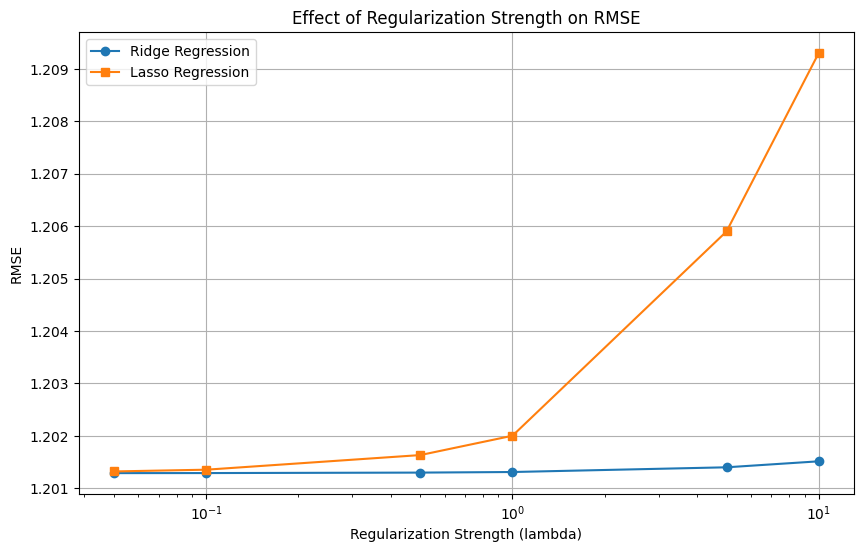

In [128]:
# Normalize features
xx = scaler.fit_transform(xx)

xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.2, random_state=42)

# Regularization parameter values
lambda_values = [0.05, 0.1, 0.5, 1, 5, 10]
ridge_rmse2 = []
lasso_rmse2 = []

# Test Ridge regularization
for lambda_ in lambda_values:
    model = PolynomialRegressorGD(degree=11, regularization='ridge', lambda_=lambda_, learning_rate=0.0001, max_iter=1000)
    model.fit(xx_train, yy_train)
    yy_pred = model.predict(xx_test)
    rmse = np.sqrt(mean_squared_error(yy_test, yy_pred))
    ridge_rmse2.append(rmse)

# Test Lasso regularization
for lambda_ in lambda_values:
    model = PolynomialRegressorGD(degree=11, regularization='lasso', lambda_=lambda_, learning_rate=0.0001, max_iter=1000)
    model.fit(xx_train, yy_train)
    yy_pred = model.predict(xx_test)
    rmse = np.sqrt(mean_squared_error(yy_test, yy_pred))
    lasso_rmse2.append(rmse)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, ridge_rmse2, label='Ridge Regression', marker='o')
plt.plot(lambda_values, lasso_rmse2, label='Lasso Regression', marker='s')
plt.xscale('log')
plt.xlabel('Regularization Strength (lambda)')
plt.ylabel('RMSE')
plt.title('Effect of Regularization Strength on RMSE')
plt.legend()
plt.grid(True)
plt.show()

**Can you explain the behaviour of RMSE for both ridge and lasso regularization?**

**Ans:**

Ridge regularization is better here as well as the last section. It has more stability in comparison to Lasso.

**What is the main difference between this section and the last section?**

**Ans:**

In the last section the dataset was polynomial, but here, the dataset is sinusoidal.

The RMSE range is less than the previous section. Also, the increase rate of RMSE for Lasso is less than the last section.

## Poissson Regression (40 points)

Poisson regression is a type of Generalized Linear Model (GLM) used for modeling count data and event occurrence rates. It assumes that the response variable $y$ follows a Poisson distribution and models the logarithm of the expected value of $y$ as a linear function of the predictors.

### Characteristics
- **Response Variable**: Count data (non-negative integers).
- **Link Function**: Logarithm function.
- **Assumption**: The mean and variance of the response variable are equal (although this can be relaxed in quasi-Poisson models).

### Model Definition
The Poisson regression model can be written as:
$y_i \sim \text{Poisson}(\mu_i)$

where $y_i$ is the observed count for the $i_{th}$ observation, and $\mu_i$ is the expected value of $y_i$.

The relationship between the predictors and $\mu_i$ is expressed as:
$\log(\mu_i) = \mathbf{x}_i^\top \boldsymbol{\beta}$

where:
- $\mathbf{x}_i = [x_{i1}, x_{i2}, \ldots, x_{ip}]^\top$: The vector of predictors for the $i_th$ observation.
- $\boldsymbol{\beta} = [\beta_0, \beta_1, \ldots, \beta_p]^\top$: The vector of coefficients.

Alternatively, in terms of $\mu_i = \exp(\mathbf{x}_i^\top \boldsymbol{\beta})$

### Log-Likelihood Function
The log-likelihood function for Poisson regression is:

$$\ell(\boldsymbol{\beta}) = \sum_{i=1}^n \left[ y_i \log(\mu_i) - \mu_i - \log(y_i!) \right]$$
where $\mu_i = \exp(\mathbf{x}_i^\top \boldsymbol{\beta})$.

### Gradient (Score Function)
The gradient of the log-likelihood with respect to $\beta$ is:
$\frac{\partial \ell}{\partial \boldsymbol{\beta}} = \sum_{i=1}^n \mathbf{x}_i (y_i - \mu_i)$

### Now, write your Poisson Regression class (10 points)

In [129]:
from scipy.special import gammaln

class PoissonRegression:
    def __init__(self, learning_rate, epochs=2000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = None  

    def _log_likelihood(self, X, y):
        linear_predictor = np.clip(X @ self.beta, -20, 20) 
        mu = np.exp(linear_predictor)
        return np.sum(y * np.log(mu + 1e-10) - mu - gammaln(y + 1))

    def _gradient_descent(self, X, y):
        for epoch in range(self.epochs):
            linear_predictor = np.clip(X @ self.beta, -20, 20)
            mu = np.exp(linear_predictor)
            gradient = np.clip(X.T @ (y - mu), -1e3, 1e3)
            self.beta += self.learning_rate * gradient

    def fit(self, X, y):
        self.beta = np.zeros(X.shape[1])
        self._gradient_descent(X, y)

    def predict(self, X):
        linear_predictor = np.clip(X @ self.beta, -20, 20)
        return np.exp(linear_predictor)


### Generate Dataset (10 points)
Generate poisson data using numpy.

In [130]:
b0 = 1  
b1 = 0.15  
x = np.linspace(0, 20, 100)
x_scaled = (x - x.mean()) / x.std() 
mu = np.exp(b0 + b1 * x)
y = np.random.poisson(mu)

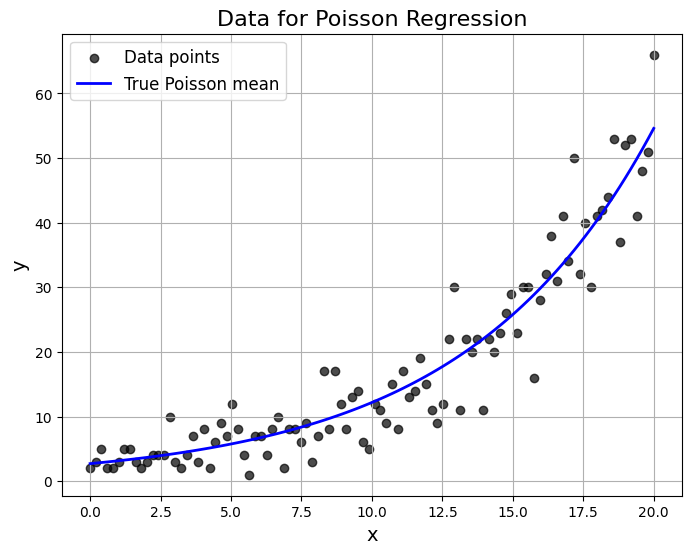

In [131]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='black', alpha=0.7, label='Data points') 
plt.plot(x, mu, color='blue', linewidth=2, label='True Poisson mean')
plt.title('Data for Poisson Regression', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

### Fit poisson regression on data and plot the predicted poisson regression (10 points)

In [132]:
X = np.column_stack((np.ones_like(x_scaled), x_scaled))
model = PoissonRegression(learning_rate=0.0005, epochs=2000)
model.fit(X, y)

y_pred = model.predict(X)

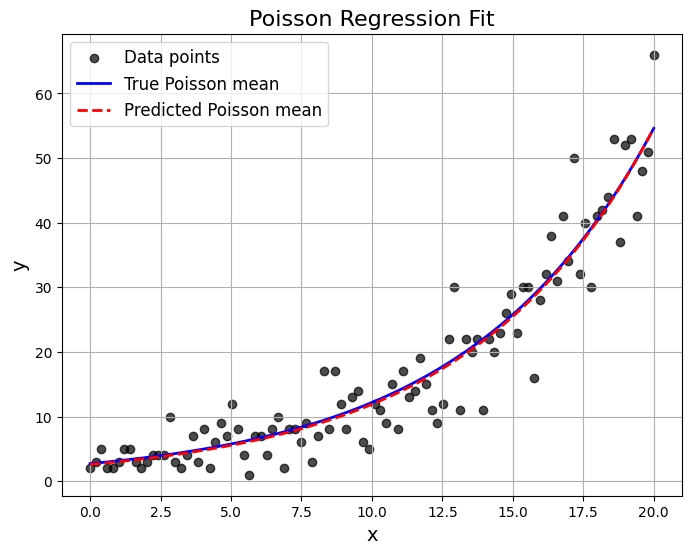

In [133]:
# plot the prediction
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='black', alpha=0.7, label='Data points')  # Plot data points
plt.plot(x, mu, color='blue', linewidth=2, label='True Poisson mean')
plt.plot(x, y_pred, color='red', linewidth=2, label='Predicted Poisson mean', linestyle = 'dashed')  # Plot predictions
plt.title('Poisson Regression Fit', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

### Use different learning rate and plot your prediction (10 points)

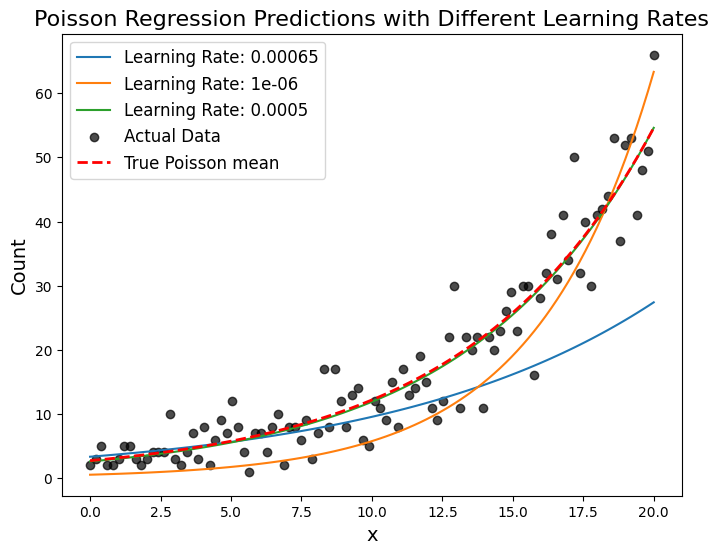

In [134]:
learning_rates = [0.00065, 0.000001, 0.0005]

plt.figure(figsize=(8, 6))

for lr in learning_rates:
    model = PoissonRegression(learning_rate=lr, epochs=2000)
    X = np.column_stack((np.ones_like(x_scaled), x_scaled))
    model.fit(X, y)

    y_pred = model.predict(X)

    plt.plot(x, y_pred, label=f'Learning Rate: {lr}')

plt.scatter(x, y, color='black', label='Actual Data', alpha=0.7)
plt.plot(x, mu, color='red', linewidth=2, label='True Poisson mean', linestyle = 'dashed')
plt.xlabel('x', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Poisson Regression Predictions with Different Learning Rates', fontsize=16)
plt.legend(fontsize=12)
plt.show()